# Inelastic Scattering for Ar Pre-Plated MCM-41 Nanopores

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from dgutils import colors as colortools

import matplotlib as mpl
import matplotlib.colors as mplcolors

import spens
from heprops import helium

import pickle,os

# Notebook display options
%config InlineBackend.figure_format = 'retina'

# plot style
plot_style = {'sans':'../include/sans.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['sans'])
figsize = plt.rcParams['figure.figsize']

## Load the Neutron Scattering Data

In [2]:
# load the Neutron Scattering data
Q,E,S,ΔS = spens.load_file('../data/SQW_2p5A_25-22_sf975.spe')

# we mask the low-energy scattering that is influenced by the elastic spill-over.
idx = np.where(E<0.5)[0]
S[:,idx] = 100

# create meshes for plotting
Emesh,Qmesh = np.meshgrid(E,Q)

## Load the Bulk Helium and 1D threshold

### The predicted threshold for hard rods

\begin{equation}
\omega_{\pm}(q) = \frac{4}{K_L} \left \lvert \frac{q}{2q_{\rm F}} \pm \left(\frac{q}{2q_{\rm F}}\right)^2\right \rvert
\end{equation}

In [3]:
_Q = np.linspace(1.0,4.0,1000)
ϵ = helium.helium_dispersion_svp(_Q)*0.0862 # convert from K to meV

#bulk_roton = np.loadtxt('../data/He4_roton_CW.dat')
#LL_threshold = np.loadtxt('../data/LL_fit_curve.dat')

# these values have been extracted from an external analysis
KL = 1.21
kF = 0.8

def ω(p,q,KL,qF):
    return (4.0/KL)*np.abs(q/(2*qF) + p*(q/(2*qF))**2)

_ω = ω(1,_Q-2*kF,KL,kF)

In [4]:
from cmaptools import readcpt
# cptfile = '../include/cequal.cpt'
# cptfile = '../include/visspec.cpt'
# cptfile = '../include/virus.cpt'
# cptfile = '../include/hx-120-120.cpt'
# cptfile = '../include/thermal.cpt'
# cptfile = '../include/haline.cpt'
# cptfile = '../include/rainbow.cpt'
# cptfile = '../include/GMT_rainbow.cpt'
cptfile = '../include/BkBlAqGrYeOrReViWh200.cpt'

cmap = readcpt(cptfile,hinge=None)
colors = colortools.get_linear_colors(cmap,100)

In [5]:
import matplotlib.font_manager as fm

font_path = '/Users/agdelma/Dropbox/AppSync/Fonts/HelveticaNeue/HelveticaNeue-Light-08.ttf'

def set_custom_font(font_path):
    
    if os.path.isfile(font_path):
        fe = fm.FontEntry(fname=font_path,name='custom')
        fm.fontManager.ttflist.insert(0, fe) 

        mpl.rcParams['font.family'] = fe.name # = 'your custom ttf font name'
        mpl.rcParams['mathtext.fontset'] = 'custom'
        mpl.rcParams['mathtext.rm'] = 'custom:regular'
        mpl.rcParams['mathtext.it'] = 'custom:italic'
        mpl.rcParams['mathtext.bf'] = 'custom:bold'

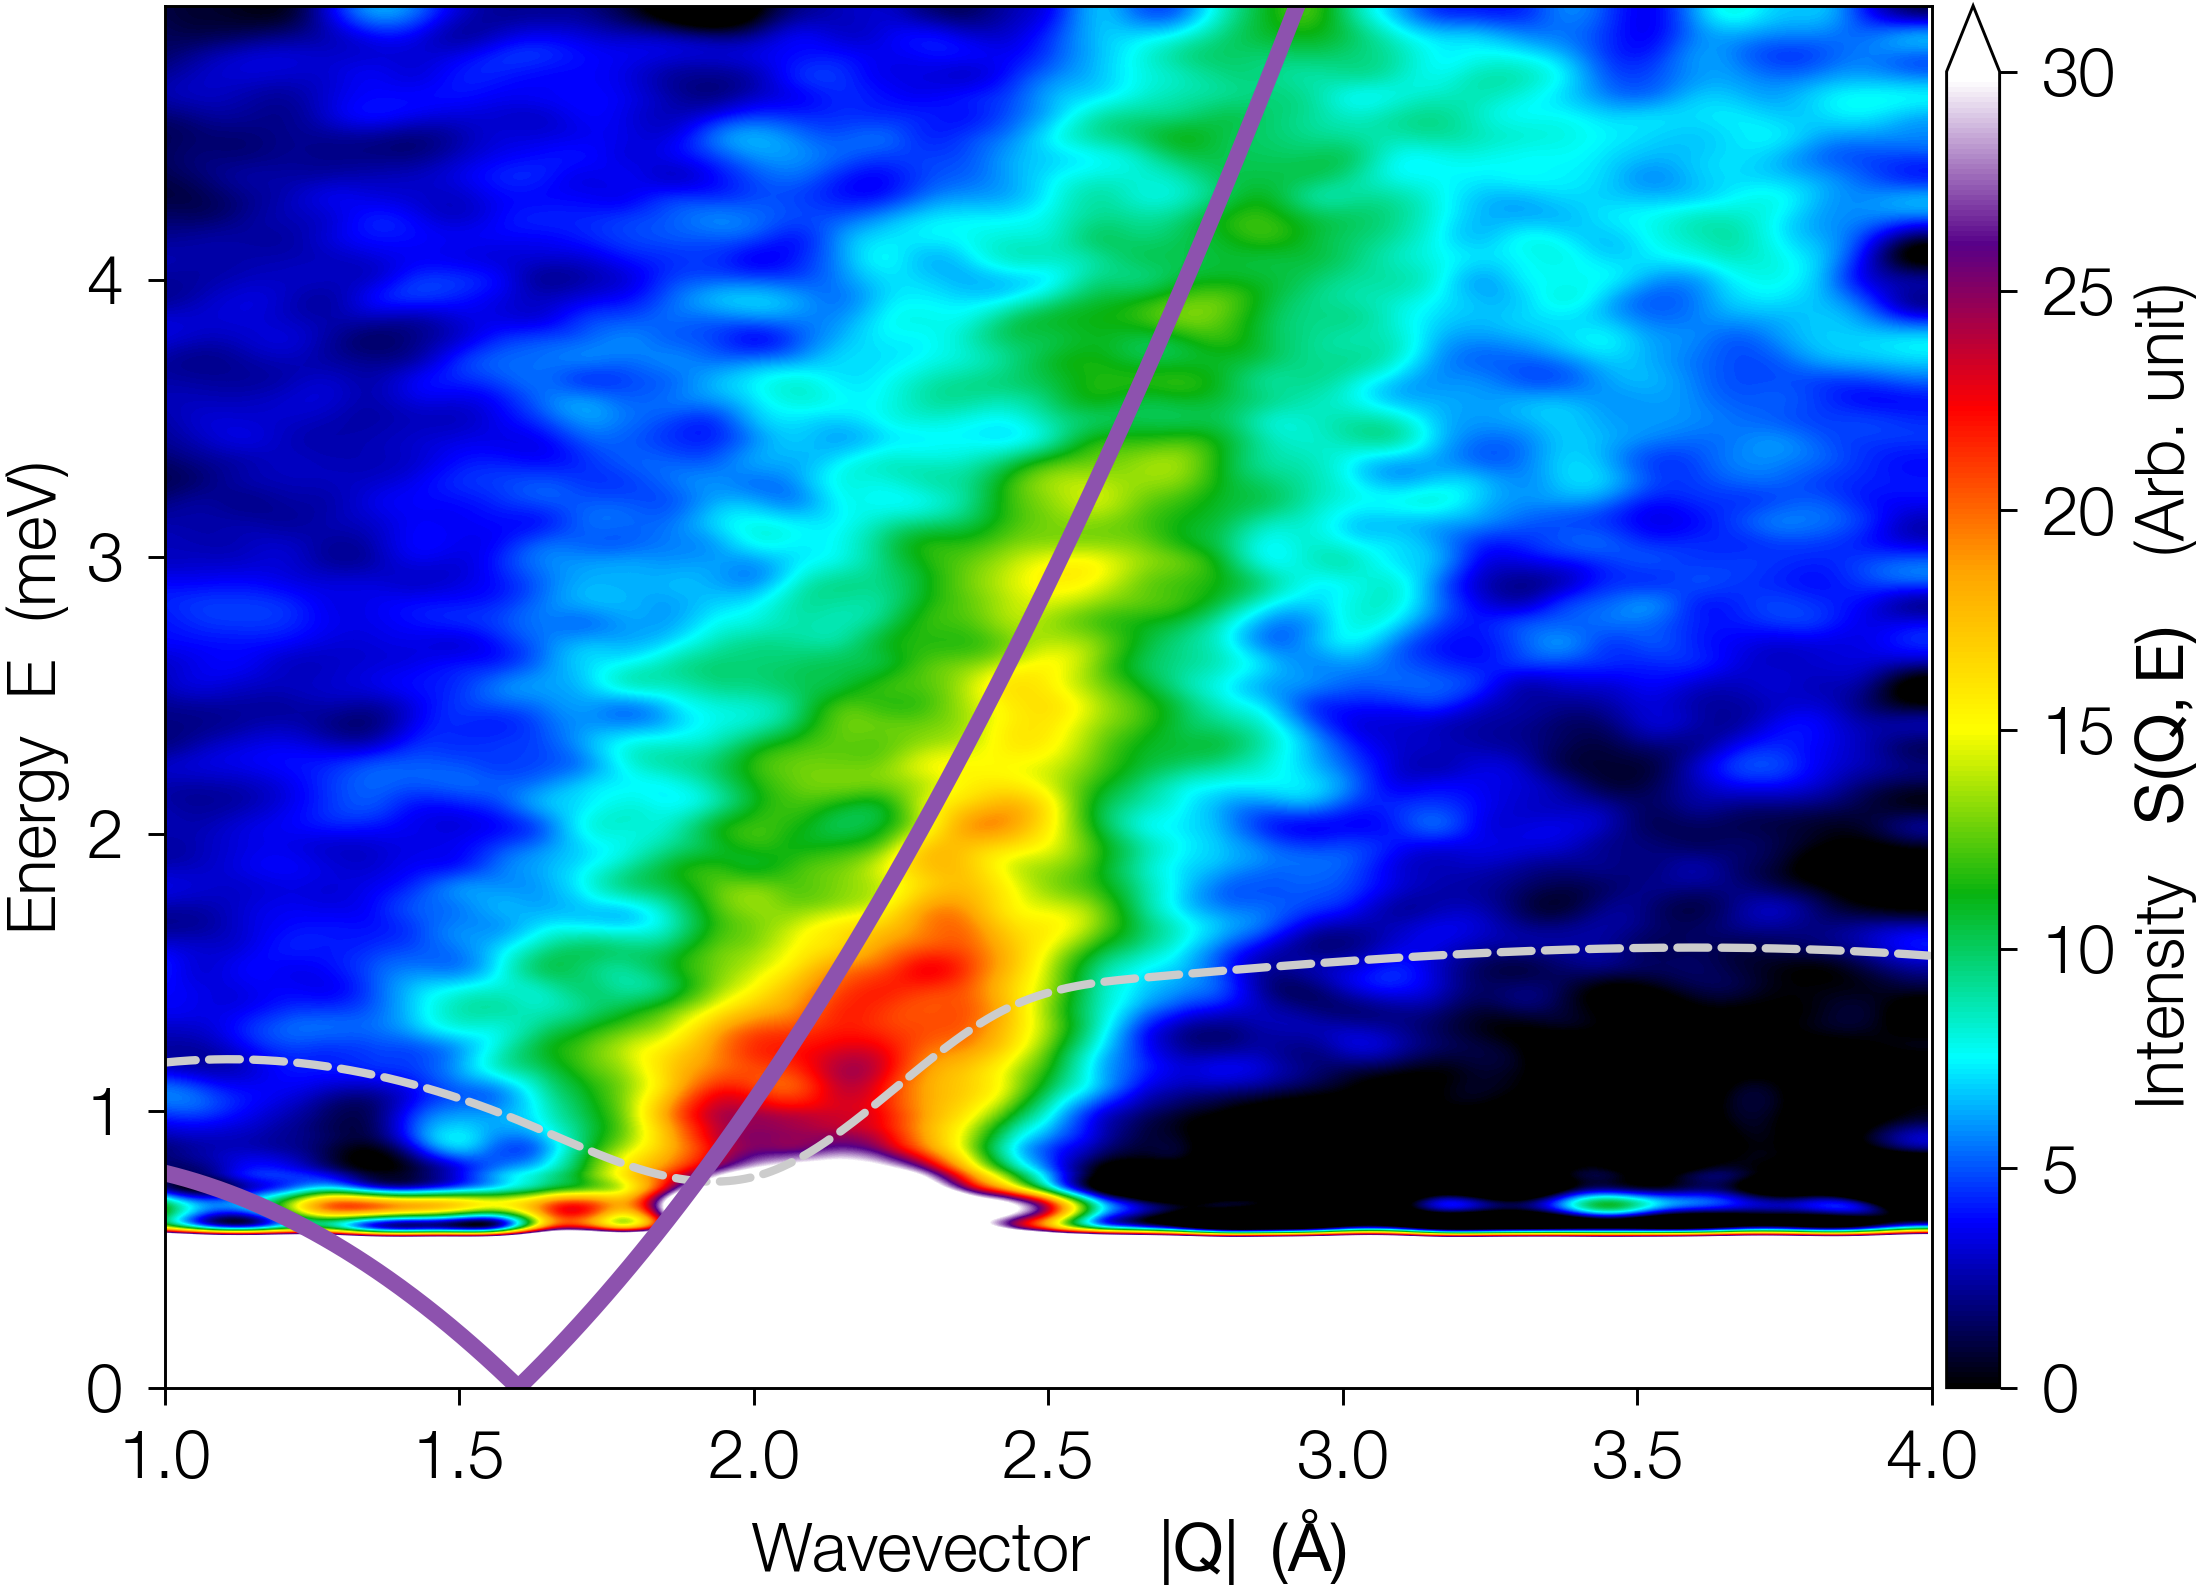

In [8]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.colors as mpl_colors
from copy import copy

# setup a masked color pallette
palette = copy(cmap)
palette.set_over('w', 1.0)
palette.set_under('k', 1.0)
    
plt.style.reload_library()
with plt.style.context(plot_style['sans']):
    figsize=plt.rcParams['figure.figsize']    
    set_custom_font(font_path)

    fig,ax = plt.subplots(1,1,figsize=(figsize[0],0.8*figsize[0]),constrained_layout=True, dpi=300)

    # nipy_spectral is also good
    #pcm = ax.pcolormesh(Qmesh,Emesh,S, edgecolor='None', rasterized=True, shading='auto', 
     #                   norm=mpl_colors.Normalize(vmin=0.0, vmax=30),cmap=palette, snap=True)
    pcm = ax.imshow(S.T, rasterized=True, interpolation='lanczos', origin='lower',
                        extent=[np.min(Q),np.max(Q),np.min(E),np.max(E)],cmap=palette, vmin=0, vmax=30, aspect='auto')

    ax.plot(_Q,ϵ, color='#CCCCCC', ls='--')
    #ax.plot(LL_threshold[:,0],LL_threshold[:,1], color=colors[1], ls='-', lw=1)
    ax.plot(_Q,_ω, color=colors[-10], ls='-', lw=2)
    
    #ax.plot(Q_th,ω(1,Q_th-1.8,0.75,0.9), color=colors[-30], ls='-', lw=2)


    ax.set_xlabel(r'Wavevector  $\;\;|Q|\;\;  ( Å )$')
    ax.set_ylabel(r'Energy  E  (meV)')
    ax.set_ylim(0,4.99)
    ax.set_xlim(1.0,4)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.025)

    plt.colorbar(pcm, cax=cax, label=r'Intensity $\;\;S(Q,E)\;\;$  (Arb. unit)',  extend='max')
    plt.savefig('../figures/SQE_blk.pdf', dpi=600)